In [1]:
import numpy as np
from skopt.space import Real,Integer
from skopt.utils import use_named_args
from skopt import gp_minimize

np.random.seed(237)
import matplotlib.pyplot as plt
from skopt.plots import plot_gaussian_process

In [2]:
from sklearn.metrics import mean_squared_error

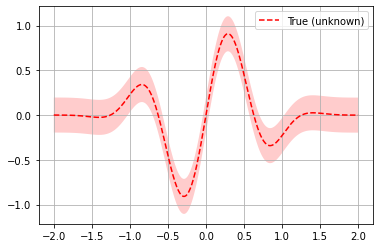

In [3]:
## Toy model from https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))\
           + np.random.randn() * noise_level

# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()



## Finding Parameters

In [4]:
# Set up mesh of observation points. 
# These are equidistant, might be interesting to have an
# irregular mesh...
mesh = np.linspace(-2, 5, 7, endpoint=False).reshape(-1, 1)
mesh

array([[-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.]])

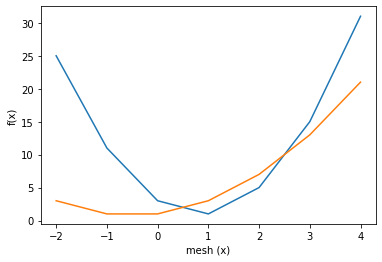

In [5]:
def t_func(x,a=1.,b=1.,c=1., nz=0.0):
    return a*x**2 + b*x + c + nz*np.random.randn()

# Unit test and create target function
targets = t_func(mesh, a=3, b=-5, c=3)  # <--- Target params a,b,c !!!

# Unit test guess function with purposefully
# incorrect a,b,c
a=1
b=1
c=1
test_f = lambda x: a*x**2 + b*x + c
preds = test_f(mesh)

#Plot test outputs
plt.plot(mesh,targets)
plt.plot(mesh,preds)
plt.xlabel('mesh (x)')
plt.ylabel('f(x)')
plt.show()

In [6]:
import time

In [7]:
space = [Real(-10.,10., name='a'),
         Real(-10.,10., name='b'),
         Real(-10.,10., name='c'),
        ]
counter = 0
@use_named_args(space)
def search_loop(a=1.,b=1.,c=1.):
    start = time.time()
    global mesh, targets, counter       # Access to mesh and actual observations
    
    test_f = lambda x: a*x**2 + b*x + c # Function form guess
    preds = test_f(mesh)                # Generate predictions
    loss = mean_squared_error(targets,preds) # Loss for gp_minimize to use
    
    print(f'Counter = {counter}    IterTime = {time.time()-start}    Loss = {loss:.2f}')
    counter += 1
    
    return loss


result_gp = gp_minimize(search_loop, space, n_calls=200,
                        random_state=11, n_jobs=2, n_initial_points=100)
print(f'\nBest result = {result_gp.fun}')
names = ['a','b','c']
for i in range(len(space)):
    print(f'{names[i]} = {result_gp.x[i]}')

Counter = 0    IterTime = 0.0002791881561279297    Loss = 6001.09
Counter = 1    IterTime = 0.00023865699768066406    Loss = 896.33
Counter = 2    IterTime = 0.00027298927307128906    Loss = 2744.93
Counter = 3    IterTime = 0.00025081634521484375    Loss = 2635.75
Counter = 4    IterTime = 0.00029277801513671875    Loss = 1165.58
Counter = 5    IterTime = 0.00023698806762695312    Loss = 1487.70
Counter = 6    IterTime = 0.0002372264862060547    Loss = 269.10
Counter = 7    IterTime = 0.00021696090698242188    Loss = 1896.66
Counter = 8    IterTime = 0.00020575523376464844    Loss = 881.41
Counter = 9    IterTime = 0.00022602081298828125    Loss = 525.91
Counter = 10    IterTime = 0.00021600723266601562    Loss = 68.31
Counter = 11    IterTime = 0.0002288818359375    Loss = 6142.16
Counter = 12    IterTime = 0.00021696090698242188    Loss = 151.18
Counter = 13    IterTime = 0.00021505355834960938    Loss = 2586.09
Counter = 14    IterTime = 0.00022602081298828125    Loss = 1836.56
Cou

Counter = 123    IterTime = 0.00017786026000976562    Loss = 0.46
Counter = 124    IterTime = 0.0001709461212158203    Loss = 1.07
Counter = 125    IterTime = 0.00019598007202148438    Loss = 3.69
Counter = 126    IterTime = 0.00016999244689941406    Loss = 1.90
Counter = 127    IterTime = 0.00017571449279785156    Loss = 0.00
Counter = 128    IterTime = 0.00019097328186035156    Loss = 4.00
Counter = 129    IterTime = 0.00016808509826660156    Loss = 0.01
Counter = 130    IterTime = 0.00016999244689941406    Loss = 4.00
Counter = 131    IterTime = 0.0001819133758544922    Loss = 4.11
Counter = 132    IterTime = 0.00017786026000976562    Loss = 1.51
Counter = 133    IterTime = 0.00017523765563964844    Loss = 0.03
Counter = 134    IterTime = 0.00018095970153808594    Loss = 0.29
Counter = 135    IterTime = 0.0001709461212158203    Loss = 4.70
Counter = 136    IterTime = 0.00018978118896484375    Loss = 115.20
Counter = 137    IterTime = 0.00021505355834960938    Loss = 0.16
Counter = 1